In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
df=pd.read_csv("sgemm_product.csv")
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81



Since we have 4 column of runtime, we will merge all the column into a new column named "Runtime" which will have mean of the four individual runtime

In [3]:
#creating Runtime, target variable by taking average of Run1, Run2, Run3, Run4
df['Runtime']=df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
df=df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)

In [4]:
x=df[['MWG','NWG','KWG','MDIMC','NDIMC','MDIMA','NDIMB','KWI','VWM','VWN','STRM','STRN','SA','SB']]
y=df[['Runtime']]
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


array([[<AxesSubplot:title={'center':'MWG'}>,
        <AxesSubplot:title={'center':'NWG'}>,
        <AxesSubplot:title={'center':'KWG'}>,
        <AxesSubplot:title={'center':'MDIMC'}>],
       [<AxesSubplot:title={'center':'NDIMC'}>,
        <AxesSubplot:title={'center':'MDIMA'}>,
        <AxesSubplot:title={'center':'NDIMB'}>,
        <AxesSubplot:title={'center':'KWI'}>],
       [<AxesSubplot:title={'center':'VWM'}>,
        <AxesSubplot:title={'center':'VWN'}>,
        <AxesSubplot:title={'center':'STRM'}>,
        <AxesSubplot:title={'center':'STRN'}>],
       [<AxesSubplot:title={'center':'SA'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'Runtime'}>, <AxesSubplot:>]],
      dtype=object)

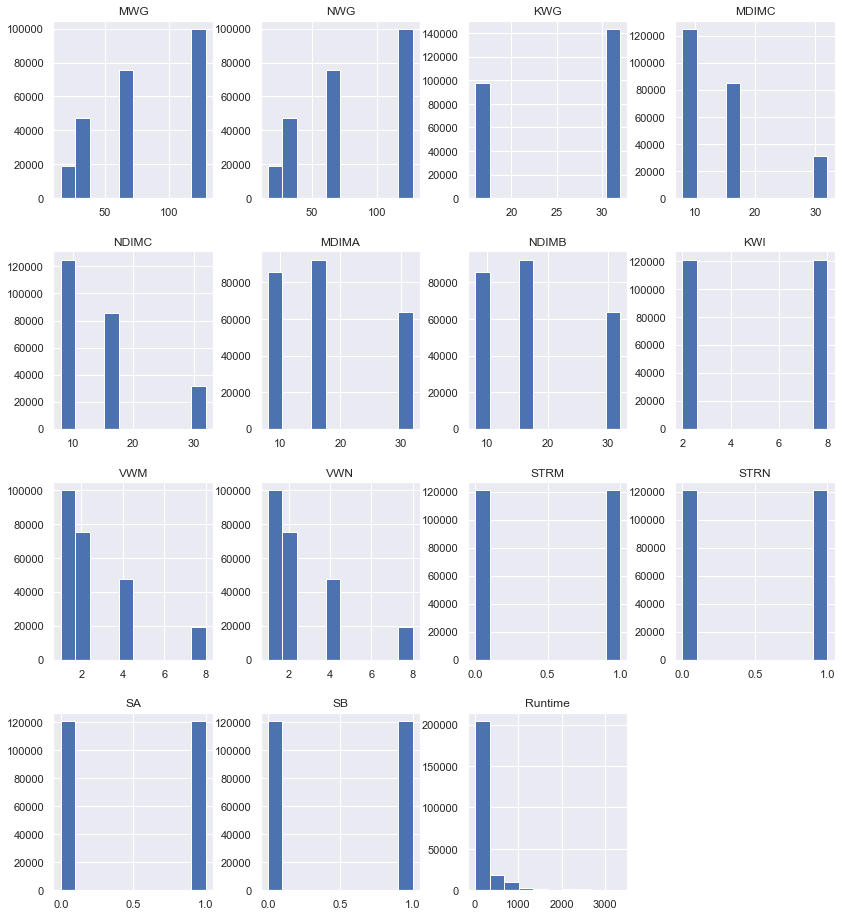

In [5]:
sns.set()
df.hist(figsize=(14,16))

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
NWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
KWG,241600.0,25.513113,7.855619,16.0000,16.0000,32.00,32.0000,32.0000
MDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
NDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
MDIMA,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
NDIMB,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
KWI,241600.0,5.000000,3.000006,2.0000,2.0000,5.00,8.0000,8.0000
VWM,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000
VWN,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000


E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Runtime', ylabel='Density'>

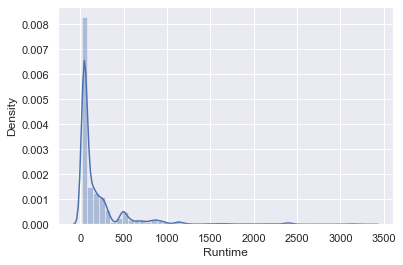

In [7]:
sns.distplot(df['Runtime'])

Target transformation
As we see in the Runtime histogram we have a logarithmic distribution, so it is a good idea to opt for a logarithmic transformation.

E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

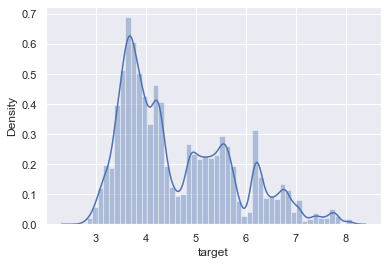

In [8]:
df['target']=np.log(df.Runtime)
sns.distplot(df['target'])

Normalitzation
So as to normalize our data and bring all the variables to the same range we should use an scaler. Due to not having outliers we might have no problem to use MinMaxScaler from sklearn. MinMaxScaler rescales the data set such that all feature values are in the range [0,1].

First of all we have to split our data into features (X) and target (Y).

In [9]:
df_target = df[['target']]
Y = df_target.to_numpy().ravel()
df_features = df.drop(columns=['target','Runtime'])
X = df_features.to_numpy()

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


Classification
First of all we have to convert this problem into a multi-classification problem, we will assign each value to the quartile it is part of.

In [11]:
X = scaler.fit_transform(df_features)
df_target = pd.qcut(df['target'].values, q=4, labels=False)
Y = df_target.ravel()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

Model selection
In the following experiment we will evaluate the following models:

1. Decision Tree
2. Logistic Regression
3. Random Forest

Decision Tree

Cross validation accuracy with K-fold=5: 0.962952204793732
Test accuracy: 0.9681291390728477


Text(0.5, 1.0, 'Test Results')

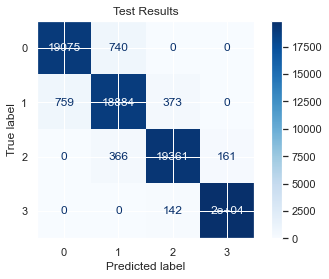

In [12]:
tree_classifier = tree.DecisionTreeClassifier()
tree_score = cross_val_score(tree_classifier, X_train, Y_train, cv = 5, scoring="accuracy")
score = tree_score.mean()
print(f'Cross validation accuracy with K-fold=5: {score}')

tree_classifier.fit(X_train, Y_train)
Y_pred = tree_classifier.predict(X_test)

print(f'Test accuracy: {metrics.accuracy_score(Y_test, Y_pred)}')

disp = metrics.plot_confusion_matrix(tree_classifier, X_test, Y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Test Results')

Logistic Regresion

Cross validation accuracy with K-fold=5: 0.6028528597117712
Test accuracy: 0.6038405578968493


Text(0.5, 1.0, 'Test Results')

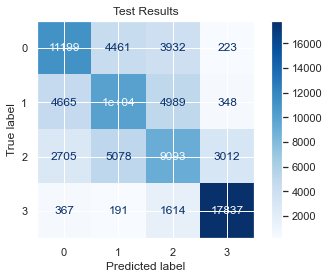

In [13]:
logistic_classifier = LogisticRegression()
logistic_score = cross_val_score(logistic_classifier, X_train, Y_train, cv = 5, scoring="accuracy")
score = logistic_score.mean()
print(f'Cross validation accuracy with K-fold=5: {score}')

logistic_classifier.fit(X_train, Y_train)
Y_pred = logistic_classifier.predict(X_test)

print(f'Test accuracy: {metrics.accuracy_score(Y_test, Y_pred)}')

disp = metrics.plot_confusion_matrix(logistic_classifier, X_test, Y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Test Results')


Random Forest

Cross validation accuracy with K-fold=5: 0.954000699450653
Test accuracy: 0.9600140477623922


Text(0.5, 1.0, 'Test Results')

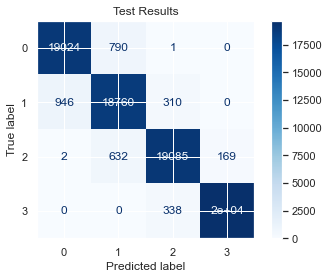

In [14]:
random_classifier = RandomForestClassifier()
random_score = cross_val_score(random_classifier, X_train, Y_train, cv = 5, scoring="accuracy")
score = random_score.mean()
print(f'Cross validation accuracy with K-fold=5: {score}')

random_classifier.fit(X_train, Y_train)
Y_pred = random_classifier.predict(X_test)

print(f'Test accuracy: {metrics.accuracy_score(Y_test, Y_pred)}')

disp = metrics.plot_confusion_matrix(random_classifier, X_test, Y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Test Results')

Text(0, 0.5, 'Accuracy')

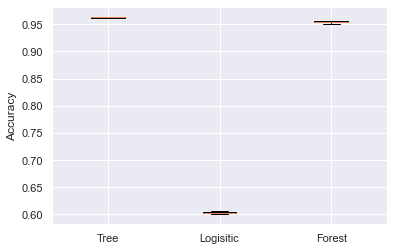

In [15]:
my_dict = {'Tree': tree_score, 'Logisitic':logistic_score, 'Forest': random_score}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
plt.ylabel('Accuracy')


We can conclude that Decision Tree and Random Forest give the best accuracy because every feature is categorical.

Even though Random Forest is an ensemble method from Decision Tree, its performance is not better, so we will opt to perform an hyperparameter search over Random Forest to know if it can get a better accuracy.

Hyperparameter Search

In [16]:
parameters = {'criterion':['gini', 'entropy'],
              'max_features':[0.1, 0.3, 0.5],
              'n_estimators': range(50, 201, 50)}

In [ ]:
rf = RandomForestClassifier()
clf = GridSearchCV(estimator = rf,  param_grid = parameters,scoring = 'accuracy',cv = 5,verbose=0)
grid_search = clf.fit(X_train, Y_train)

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n', (grid_search.best_estimator_))